# Homework 1

`airbnb.csv` 데이터셋은 airbnb에 등록된 샌프란시스코 지역의 listing 데이터의 일부이다. 

- 'id': listing id
- 'room_type': 집 또는 방의 형태 (entire home/apt, private room, shared room)
- 'number_of_reviews': 총 리뷰 수
- 'review_scores_rating': 전체 리뷰 점수 
- 'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value': 각 부분의 리뷰 점수
- 'reviews_per_month': 월 평균 리뷰 수 
- 'Downtown': Downtown까지의 거리 
- 'PerCapitaIncome': 해당 지역의 소득수준
- 'most_freq_aspect': listing description에서 가장 많이 나타난 주제

아래의 질문에 답하기 위해 적절한 통계량/그래프를 출력하고 서술하시오. 완성된 답안은 **html** 파일로 다운받아 제출하시오. (File>Download as>HTML)


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import os 

import seaborn as sns
import matplotlib.pylab as plt
print("Current location:", os.getcwd())
data = pd.read_csv("C:\\Users\\nlpla\\Downloads\\airbnb.csv") # data가 저장되어 있는 경로로 각자 수정 필요 

Current location: C:\Users\nlpla\Downloads


In [2]:
data.shape

(6105, 14)

In [3]:
data.head()

,id,room_type,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,Downtown,PerCapitaIncome,most_freq_aspect
0,958,Entire home/apt,222.0,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1.77,4068.132073,110777,int_style
1,3850,Private room,167.0,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1.33,6792.053605,93008,comm
2,5858,Entire home/apt,111.0,98.0,10.0,10.0,10.0,10.0,10.0,9.0,0.87,5666.128342,69778,nature
3,7918,Private room,18.0,86.0,8.0,8.0,9.0,9.0,9.0,8.0,0.15,5573.866947,99041,comm
4,8142,Private room,8.0,93.0,9.0,9.0,10.0,10.0,9.0,9.0,0.13,5632.882874,99041,comm


#### 1. 데이터가 포함한 각 변수의 종류를 구분하시오.

In [4]:
data.columns

Index(['id', 'room_type', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'Downtown', 'PerCapitaIncome', 'most_freq_aspect'],
      dtype='object')

"""
'id', 'room_type', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'Downtown', 'PerCapitaIncome', 'most_freq_aspect'
"""

"""
범주형 데이터:
        id(listing id)
        room_type(집 또는 방의 형태-(entire home/apt, private room, share room)) 
        most_freq_aspect(listing description에서 가장 많이 나타난 주제)
    
수치형 데이터:
        number_of_reviews(총 리뷰수)
        review_scores_rating(전체 리뷰 점수)
        review_scores_accuracy, review_scores_cleanliness,
        review_scores_checkin, review_scores_communication,
        review_scores_location, review_scores_value,
        reviews_per_month(월 평균 리뷰 수)   
        Downtown(Downtown까지의 거리) 
        PerCapitaIncome(해당 지역의 소득수준)
"""

#### 2. `reviews_per_month`의 평균, 중위수를 계산하고 비교하여 분포의 모양을 추측해보시오. 

In [5]:
print("Mean of reviews_per_month:", data.reviews_per_month.mean())
print("Median of reviews_per_month:", data.reviews_per_month.median())

Mean of reviews_per_month: 1.8882506142506121
Median of reviews_per_month: 1.03


중위수보다 평균이 작으므로 종 모양의 그래프가 아닌 한쪽으로 쏠린 그래프 모양이 나타난다.
즉 평균과 중위수가 같지 않아 3의 그래프 처럼 한쪽으로 쏠린 그래프 형태를 뛴다.

#### 3. `reviews_per_month`의 히스토그램을 통해 위에서 추측한 사실이 맞는지 확인해보시오. 

실제 2번의 추측과 히스토그램의 현상이 일치함을 보여준다.

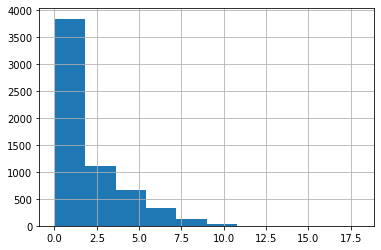

In [6]:
data.reviews_per_month.hist()

In [7]:
data['log_reviews_per_month'] = np.log(data.reviews_per_month)
print("Mean of log_reviews_per_month:", data.log_reviews_per_month.mean())
print("Median of log_reviews_per_month:", data.log_reviews_per_month.median())

Mean of log_reviews_per_month: -0.12250584111239882
Median of log_reviews_per_month: 0.02955880224154443


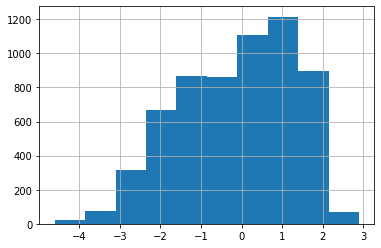

In [8]:
data.log_reviews_per_month.hist()

In [9]:
_std = data.log_reviews_per_month.std()
_mean = data.log_reviews_per_month.mean()
print("68%:", _mean-1*_std, "< x <", _mean+1*_std)
print("95%:", _mean-2*_std, "< x <", _mean+2*_std)
print("99.7%:", _mean-3*_std, "< x <", _mean+3*_std)

68%: -1.5213829486408845 < x < 1.2763712664160871
95%: -2.9202600561693703 < x < 2.675248373944573
99.7%: -4.319137163697856 < x < 4.074125481473058


#### 4. `reviews_per_month`의 평균과 중위수를 각 `room_type`별로 계산하여 비교하시오.

In [10]:
print("The mean of reviews_per_month by room_type")
data.groupby('room_type').reviews_per_month.mean()

The mean of reviews_per_month by room_type


room_type
Entire home/apt    1.530804
Private room       2.434912
Shared room        1.635855
Name: reviews_per_month, dtype: float64

In [11]:
print("The median of reviews_per_month by room_type")
data.groupby('room_type').reviews_per_month.median()

The median of reviews_per_month by room_type


room_type
Entire home/apt    0.750
Private room       1.815
Shared room        0.735
Name: reviews_per_month, dtype: float64

room_type 별 reviews_per_month의중위수와 평균을 비교해 보면 2번과 3번 예제처럼 
평균이 값이 중위수의 값보다 큰 현상을 보여주고 있다. 이는 
2번과 3번으로 부터 추론된 그래프 현상을 보여줄 것이라고 예상된다.

#### 5. `reviews_per_month`의 Boxplot을  `room_type`별로 그려서 비교하시오.

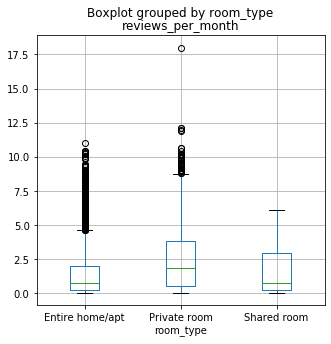

In [12]:
data.boxplot(by='room_type', column='reviews_per_month', figsize=(5,5))

In [13]:
data.room_type.value_counts(sort=False)

Shared room         152
Entire home/apt    3557
Private room       2396
Name: room_type, dtype: int64

room_type 별 reviews_per_month의 boxplot으로 하한값보다 관측량이
Entire home/apt과 Private room에서 많은 경향을 보여 주고, private room의 
reviews_per_month의 Q1과 Q3의 50%의 데이터 함량이 많을 것을 보여준다.

#### 6. `most_freq_aspect`의 도수분포표를 출력하고 이를 활용해 bar plot을 그려서 어떤 aspect가 가장 빈번하게 나타났는지 확인하시오.

In [14]:
data.most_freq_aspect.value_counts(sort=False)

int_style      802
visitor        479
nature         357
attr_trans     658
facil          498
bedroom        326
comm          1187
nbhd           683
bldg           911
kitchen        204
Name: most_freq_aspect, dtype: int64

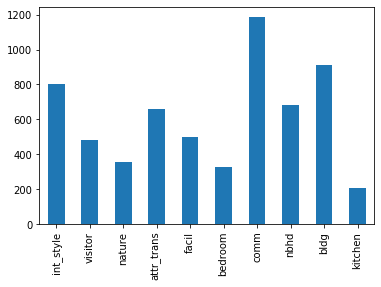

In [15]:
ax = data.most_freq_aspect.value_counts(sort=False).plot.bar()

위의 bar plot결과 가장 빈번하게 나타난 경우는 comm이다.

#### 7. `room_type`과 `most_freq_aspect`의 mosaic plot을 통해 room type에 따라 자주 나타나는 aspect의 특징이 다른지 비교하시오.

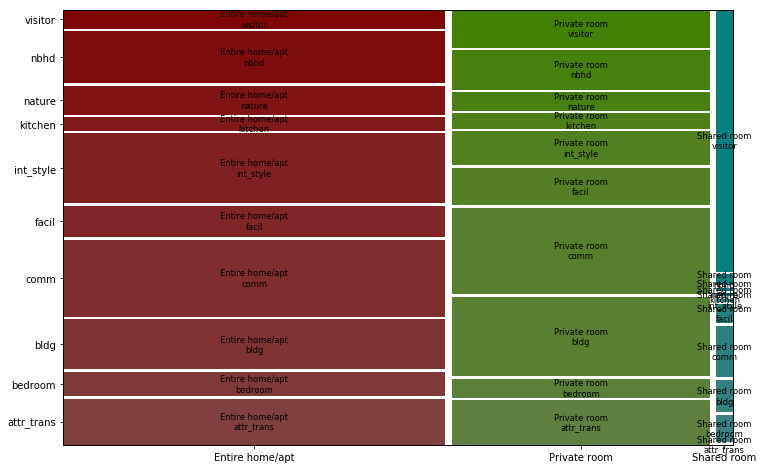

In [16]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['figure.figsize'] = [12, 8]
mosaic(data.sort_values('most_freq_aspect'), ['room_type', 'most_freq_aspect'], gap=0.01)
plt.show()

mosaic 결과 Entire home/apt의 경우 첫번째로 comm 두번째로 int_style
Private room의 결과도 Entire home/apt와 비슷한 경향을 보여주고 있다. 
하지만 Shared room에서는 visitor가 가장 많은 경우로 보여준다. 
아래의 그래프는 most_freq_aspect에 따른 bar plot를 보여준다.

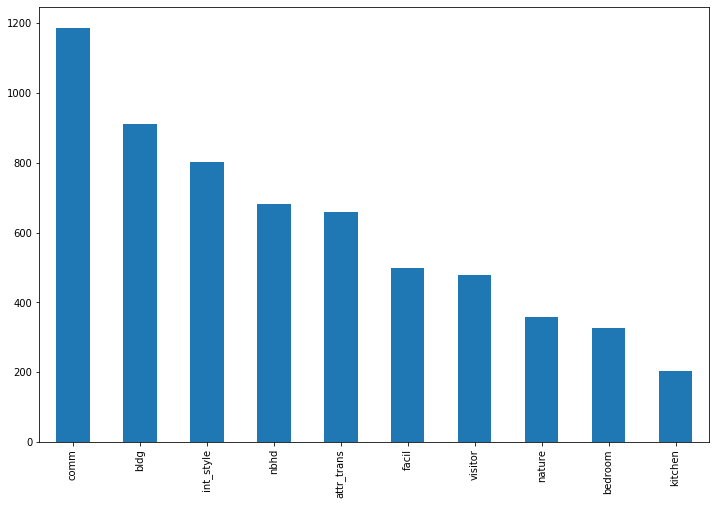

In [17]:
data.most_freq_aspect.value_counts().plot.bar()

아래의 그래프는 most_freq_aspect에 따른 mosaic 결과를 보여준다.

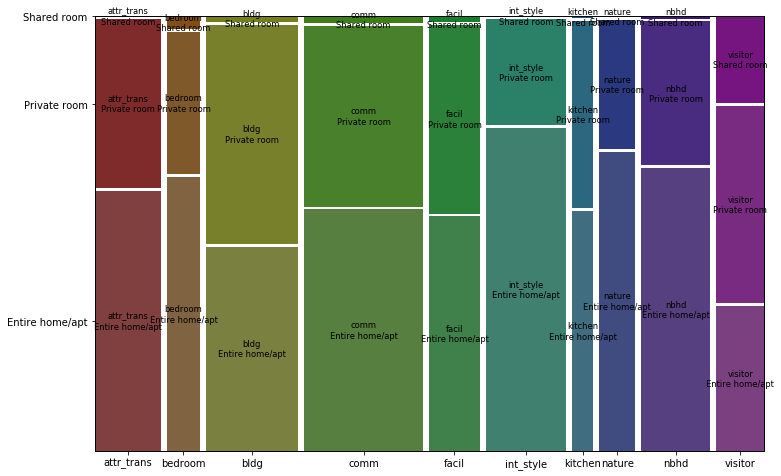

In [18]:
plt.rcParams['figure.figsize'] = [12, 8]
mosaic(data.sort_values('most_freq_aspect'), ['most_freq_aspect', 'room_type'], gap=0.01)
plt.show()

#### 8. 7개의 review_scores 변수들과 `Downtown`, `PerCapitaIncome`, `reviews_per_month` 변수와의 상관계수 행렬과 그것의 heatmap을 통해 변수들 간의 상관관계를 관찰하고 서술하시오.

In [19]:
review_sample = data[[ 'review_scores_rating','review_scores_accuracy', 
                       'review_scores_cleanliness', 'review_scores_checkin',
                       'review_scores_communication', 'review_scores_location',
                       'review_scores_value',
                       'Downtown', 'PerCapitaIncome', 'reviews_per_month']]

review_sample.head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,Downtown,PerCapitaIncome,reviews_per_month
0,97.0,10.0,10.0,10.0,10.0,10.0,9.0,4068.132073,110777,1.77
1,95.0,10.0,10.0,10.0,10.0,10.0,10.0,6792.053605,93008,1.33
2,98.0,10.0,10.0,10.0,10.0,10.0,9.0,5666.128342,69778,0.87
3,86.0,8.0,8.0,9.0,9.0,9.0,8.0,5573.866947,99041,0.15
4,93.0,9.0,9.0,10.0,10.0,9.0,9.0,5632.882874,99041,0.13


In [20]:
corr = review_sample.corr(method="pearson")
print(corr)

                             review_scores_rating  review_scores_accuracy  \
review_scores_rating                     1.000000                0.705048   
review_scores_accuracy                   0.705048                1.000000   
review_scores_cleanliness                0.666860                0.611907   
review_scores_checkin                    0.485924                0.462369   
review_scores_communication              0.637921                0.586284   
review_scores_location                   0.451721                0.359659   
review_scores_value                      0.686506                0.570344   
Downtown                                 0.054043                0.084931   
PerCapitaIncome                          0.125469                0.063065   
reviews_per_month                        0.078814                0.135251   

                             review_scores_cleanliness  review_scores_checkin  \
review_scores_rating                          0.666860               0.

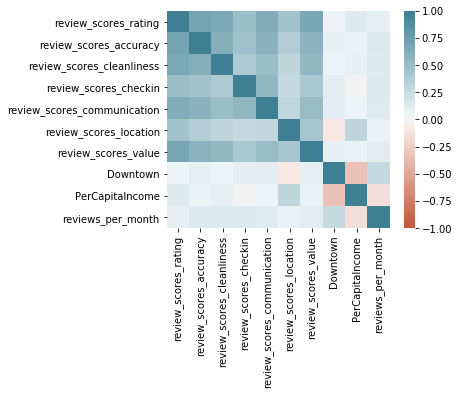

In [21]:
fig, ax = plt.subplots(figsize=(5,4))

ax = sns.heatmap(corr, vmin=-1, vmax=1,
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout
plt.show()

위의 상관계수의 heatmap을 보면 7개의 review_score들은 서로 양의 상관관계를 보여주고
7개의 review_score과 Downtown, PerCapitaIncome, reviews_per_month 변수들의 상관관계는
대부분 0의 값으로 서로 상관관계가 없을 확인하였다. 

또한 Downtown, PerCapitaIncome, reviews_per_month 변수들의 서로 상관관계를 보면
Downtown 과 PerCapitaIncome 그리고 PerCapitaIncome과 reviews_per_month의 변수 쌍이 음의 상관관계를 보여주고 있다. 